In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
df = pd.read_csv('Employers_data.csv')
print(df.head())

   Employee_ID            Name  Age  Gender   Department  Job_Title  \
0            1    Merle Ingram   24  Female  Engineering   Engineer   
1            2      John Mayes   56    Male        Sales  Executive   
2            3    Carlos Wille   21    Male  Engineering     Intern   
3            4  Michael Bryant   30    Male      Finance    Analyst   
4            5   Paula Douglas   25  Female           HR    Analyst   

   Experience_Years Education_Level  Location  Salary  
0                 1          Master    Austin   90000  
1                33          Master   Seattle  195000  
2                 1        Bachelor  New York   35000  
3                 9        Bachelor  New York   75000  
4                 2          Master   Seattle   70000  


In [52]:
df.tail()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000
9999,10000,Joan Sorensen,25,Female,Sales,Analyst,4,Bachelor,San Francisco,70000


In [54]:
df.shape

(10000, 10)

<Axes: >

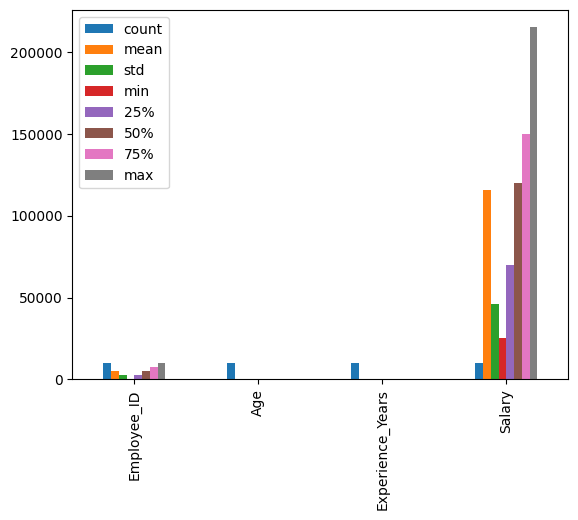

In [55]:
df.describe().T.plot(kind='bar')

In [56]:
print('\nStatistical Summary:')
print(df.describe())


Statistical Summary:
       Employee_ID           Age  Experience_Years         Salary
count  10000.00000  10000.000000      10000.000000   10000.000000
mean    5000.50000     35.455900         12.370900  115381.500000
std     2886.89568     10.000213          9.148951   46066.139047
min        1.00000     21.000000          0.000000   25000.000000
25%     2500.75000     27.000000          5.000000   70000.000000
50%     5000.50000     34.000000         10.000000  120000.000000
75%     7500.25000     43.000000         19.000000  150000.000000
max    10000.00000     60.000000         37.000000  215000.000000


In [57]:
df.duplicated().sum()

np.int64(0)

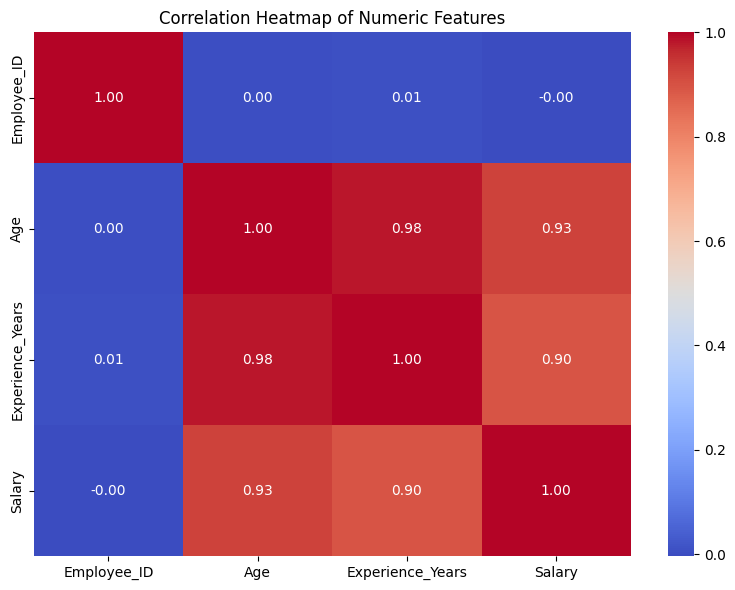

In [58]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

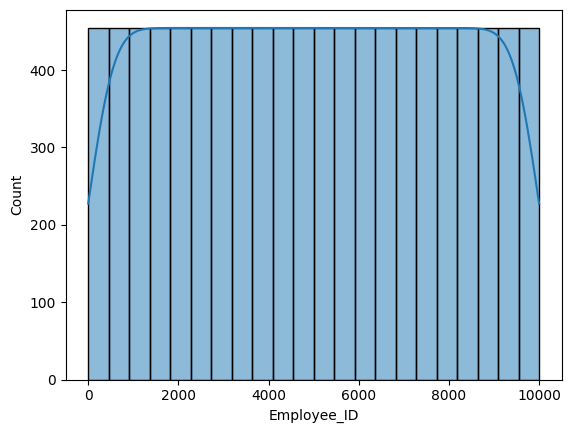

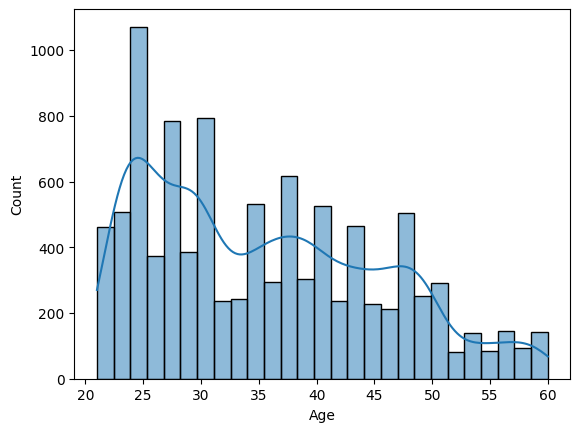

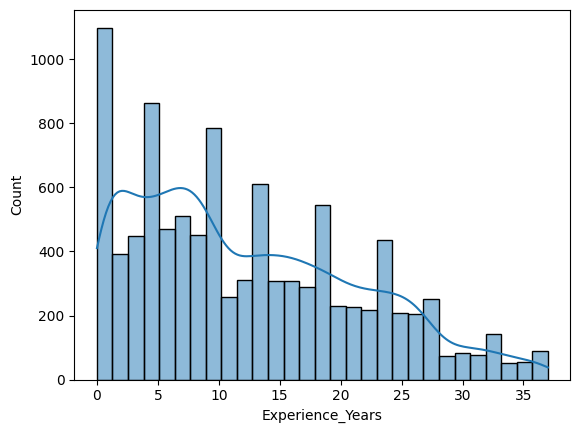

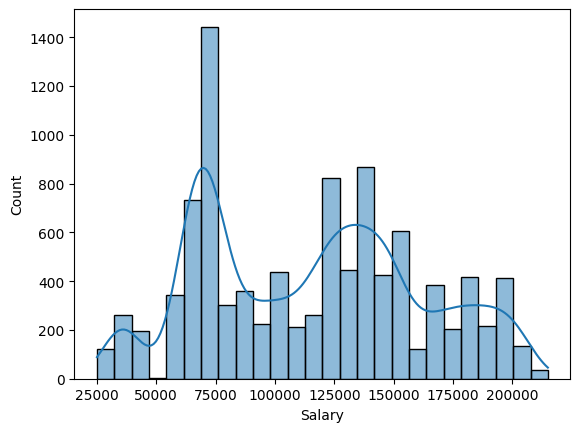

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Distribution plot for each numeric column
for col in numeric_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

In [61]:
for col in df:
    if df[col].dtype == '0':
        sns.countplot(x=col, data=df)
        plt.show()

In [64]:
df = df.drop(columns=['Name', 'Employee_ID'])

df_dummies = pd.get_dummies(df, drop_first=True)


In [66]:
x = df_dummies.drop(columns=['Salary'])
y = df_dummies['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17375021.62159711
R-squared: 0.9917562580370475
